# Bonds

In [1]:
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We want to calculate the upfront PV we need to invest at 2% annual interest compounded monthly, with monthly top-ups of USD 250 to reach USD 12,000 in 6 years.

In [2]:
pv_1 = -npf.pv(rate=0.02/12, nper=6*12, pmt=-250, fv=12000)
print("3% Annual Interest: ", pv_1)

3% Annual Interest:  -6304.536368548936


# Zero coupon bonds

We want to calculate the price of a zero coupon bond with a 5 year maturity, 4% yield, and USD 1000 face value.

In [3]:
pv_2 = -npf.pv(rate=0.04, nper=5, pmt=0, fv=1000)
print("5 year 4% yield zero coupon bond: ", pv_2)

5 year 4% yield zero coupon bond:  821.9271067593517


# Fixed rate bonds (periodic coupon payments and principal at maturity) 

We want to calculate the price of a 5 year bond with a face value of USD 1000, annual coupon of 2%, yield of 4%

In [4]:
pv_3 = -npf.pv(rate=0.04, nper=5, pmt=2, fv=1000)
print("4% Yield Price: ", pv_3)

4% Yield Price:  830.8307514213841


# Bond prices and yields

Bond prices and yields have an inverse relationship. When bond prices rise, yields fall, and vice versa. This relationship exists because bond prices and yields adjust to make the bond's return competitive with current market conditions.

d:\anaconda\Lib\site-packages\numpy_financial\_financial.py:531: RuntimeWarning: invalid value encountered in divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)
d:\anaconda\Lib\site-packages\numpy_financial\_financial.py:531: RuntimeWarning: invalid value encountered in divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)


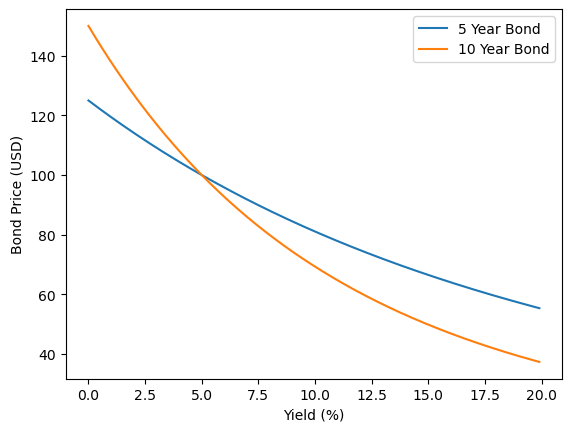

In [5]:
bond_yields = np.arange(0, 20, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])

bond['bond_price_5Y'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=5, pmt=5, fv=100)
bond['bond_price_10Y'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=10, pmt=5, fv=100)

plt.plot(bond['bond_yield'], bond['bond_price_5Y'], label='5 Year Bond')
plt.plot(bond['bond_yield'], bond['bond_price_10Y'], label='10 Year Bond')
plt.xlabel('Yield (%)')
plt.ylabel('Bond Price (USD)')
plt.legend()
plt.show()

# Calculating coupon bond yields

* Bond A - three-year bond paying a 3% annual coupon with a price of USD 90
* Bond B - five-year bond paying a 6% annual coupon with a price of USD 105

As we can see below, the greatest yield to maturity offers bond A.

In [6]:
bond_a = npf.rate(nper=3, pmt=3, pv=-90, fv=100)
print("Bond A: ", bond_a)
bond_b = npf.rate(nper=5, pmt=6, pv=-105, fv=100)
print("Bond B: ", bond_b)

Bond A:  0.06796346716536039
Bond B:  0.048499132485122734


# Interest rate sensitivity

We compare the price impact on two bonds from a change in interest rates to establish which bond has a higher level of interest rate sensitivity.

* 10 year bond with 3% annual coupon at 3% yield
* 10 year bond with 3% annual coupon at 4% yield

As we can see the bond with the higher maturity is more sensitive to interest rate changes

In [7]:
bond_a = -npf.pv(rate=0.03, nper=10, pmt=3, fv=100)
print("10 Year Bond 3% Yield: ", bond_a)

bond_b = -npf.pv(rate=0.04, nper=10, pmt=3, fv=100)
print("10 Year Bond 4% Yield: ", bond_b)

10 Year Bond 3% Yield:  100.0
10 Year Bond 4% Yield:  91.88910422064497


# Duration

<b>Duration</b> measures the sensitivity of a bond's price to changes in interest rates. Duration tells us the percentage change in a bond's price for a one percent change in yields.


$$ \text{Duration} = \frac{{P_{\text{down}} - P_{\text{up}}}}{{2 \cdot P \cdot \Delta y}} $$


In our example, we calculate the duration of a 10 year zero coupon bond with a 4% yield with face value USD 1000.

In [8]:
# Zero coupon
price = -npf.pv(rate=0.04, nper=10, pmt=0, fv=1000)
price_up = -npf.pv(rate=0.05, nper=10, pmt=0, fv=1000)
price_down = -npf.pv(rate=0.03, nper=10, pmt=0, fv=1000)

duration = (price_down - price_up) / (2 * price * 0.01)
print("Zero Coupon Bond Duration: ", duration)


# Coupon paying bond
price = -npf.pv(rate=0.04, nper=10, pmt=3, fv=1000)
price_up = -npf.pv(rate=0.05, nper=10, pmt=3, fv=1000)
price_down = -npf.pv(rate=0.03, nper=10, pmt=3, fv=1000)

duration = (price_down - price_up) / (2*price*0.01)
print("Coupon Paying Bond Duration: ", duration)

Zero Coupon Bond Duration:  9.634958998952941
Coupon Paying Bond Duration:  9.473257660103878


Coupon bonds are less sensitive to interest rates than their zero coupon equivalents. The reason for it is that zero coupon bonds are more exposed to changes in interest rates as they have longer time to maturity.

* Longer maturity = higher duration
* Higher coupon = lower duration
* Lower yields = higher sensitivity to interest rates = higher duration

As we can see, there is higher duration for coupon with longer maturity.

In [9]:
# 10 year bond
price_10y = -npf.pv(rate=0.05, nper=10, pmt=3, fv=100)
price_up_10y = -npf.pv(rate=0.06, nper=10, pmt=3, fv=100)
price_down_10y = -npf.pv(rate=0.04, nper=10, pmt=3, fv=100)
duration_10y = (price_down_10y - price_up_10y) / (price_10y * 2 * 0.01)
print("10 Year Bond: ", duration_10y)

# 20 year bond
price_20y = -npf.pv(rate=0.05, nper=20, pmt=3, fv=100)
price_up_20y = -npf.pv(rate=0.06, nper=20, pmt=3, fv=100)
price_down_20y = -npf.pv(rate=0.04, nper=20, pmt=3, fv=100)
duration_20y = (price_down_20y - price_up_20y) / (2 * price_20y * 0.01)
print("20 Year Bond: ", duration_20y)

10 Year Bond:  8.260370518687731
20 Year Bond:  13.865652120642753


# Dollar duration

The dollar duration measures the dollar change in a bond's value to a change in the market interest rate. The most common way to measure interest risk is <b>DV01</b>. It is the dollar change in a bond's price for a zero-point-zero-one percent change in yields. DV01 is short for "the dollar value of one basis point". DV01 is the same as dollar duration, except we multiply by one basis point instead of one percent.

$$ \text{Dollar Duration} = {{\text{Duration} * \text{Bond Price} * 0.01}} $$

$$ \text{DV01} = {{\text{Duration} * \text{Bond Price} * 0.0001}} $$



Calculate the dollar duration and DV01 of a bond. The bond has a 30 year maturity, coupon rate of 3.5%, yield to maturity of 5%, and face value of USD 100


In [10]:
price = -npf.pv(rate=0.05, nper=30, pmt=3.5, fv=100)
price_up = -npf.pv(rate=0.06, nper=30, pmt=3.5, fv=100)
price_down = -npf.pv(rate=0.04, nper=30, pmt=3.5, fv=100)
duration = (price_down - price_up) / (2 * price * 0.01)

dollar_duration = duration * price * 0.01
print("Dollar Duration: ", dollar_duration)

dv01 = duration * price * 0.0001
print("DV01: ", dv01)

Dollar Duration:  12.88303061419567
DV01:  0.1288303061419567


We calculate the quantity of a bond needed to hedge a portfolio.

In [11]:
portfolio_dv01 = 5000
bond_dv01 = 0.1288
bond_price = 76.94

hedge_quantity = portfolio_dv01 / bond_dv01
print("Number of bonds to sell: ", hedge_quantity)

hedge_amount = hedge_quantity * bond_price
print("Dollar amount to sell: USD", hedge_amount)

Number of bonds to sell:  38819.875776397515
Dollar amount to sell: USD 2986801.2422360247


Duration is an accurate estimator of bond prices for small changes in yields, but as the yield change increases, this estimate becomes less accurate

# Convexity

Convexity is the curvature in the relationship between bond prices and interest rates. It reflects the rate at which the duration of a bond changes as interest rates change.

Convexity increases when a bond has:
* higher maturity
* lower coupon
* lower yield

In [12]:
price = -npf.pv(rate=0.05, nper=20, pmt=6, fv=100)
price_up = -npf.pv(rate=0.06, nper=20, pmt=6, fv=100)
price_down = -npf.pv(rate=0.04, nper=20, pmt=6, fv=100)

convexity = (price_down + price_up - 2 * price) / (price * 0.01 ** 2)
print("Convexity: ", convexity)

Convexity:  200.6213463156488


The bond with the higher maturity shows a much more curved price/yield relationship and therefore has a higher convexity

d:\anaconda\Lib\site-packages\numpy_financial\_financial.py:531: RuntimeWarning: invalid value encountered in divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)
d:\anaconda\Lib\site-packages\numpy_financial\_financial.py:531: RuntimeWarning: invalid value encountered in divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)


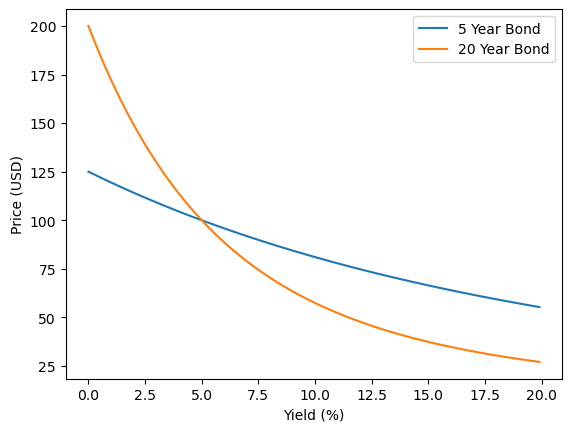

In [13]:
bond_yields = np.arange(0, 20, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])

bond['price_5y'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=5, pmt=5, fv=100)
bond['price_20y'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=20, pmt=5, fv=100)

plt.plot(bond['bond_yield'], bond['price_5y'])
plt.plot(bond['bond_yield'], bond['price_20y'])
plt.xlabel('Yield (%)')
plt.ylabel('Price (USD)')
plt.legend(["5 Year Bond", "20 Year Bond"])
plt.show()

# Dollar convexity

Dollar convexity is the dollar change in duration for a one percent change in yields.

$$ \text{Dollar Convexity} = {{\text{Convexity} * \text{Bond Price} * 0.01}} $$

In this example, for a 1% change in yields, the dollar duration will change by just under 84 cents.

In [14]:
price = -npf.pv(rate=0.03, nper=10, pmt=2, fv=100)
price_up = -npf.pv(rate=0.04, nper=10, pmt=2, fv=100)
price_down = -npf.pv(rate=0.02, nper=10, pmt=2, fv=100)

convexity = (price_down + price_up - 2 * price) / (price * 0.01 ** 2)

dollar_convexity = convexity * price * 0.01 ** 2
print("Dollar convexity: ", dollar_convexity)

Dollar convexity:  0.8386141148415902
